In [2]:
import os
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

#enter your directory here
directory = r"/Users/uw-user/Downloads/AIprojectCode/Project"
street_shape = "streets.shp"
streets = gpd.read_file(os.path.join(directory, street_shape))



# Create a graph from the shapefile
G = nx.Graph()

for idx, row in streets.iterrows():
    line = row['geometry']
    if line.geom_type == 'LineString':
        # Get the points along the LineString
        points = list(line.coords)
        
        # Loop through each segment in the LineString and add as an edge in the graph
        for i in range(len(points) - 1):
            start = points[i]
            end = points[i + 1]
            
            # Add edge with relevant attributes (you can add more if needed)
            G.add_edge(
                start, 
                end, 
                length=line.length, 
                speed_limit=row['speedlim'], 
                road_name=row['st_name']
            )

# Optional: Check the number of nodes and edges in your graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



Number of nodes: 74945
Number of edges: 77306


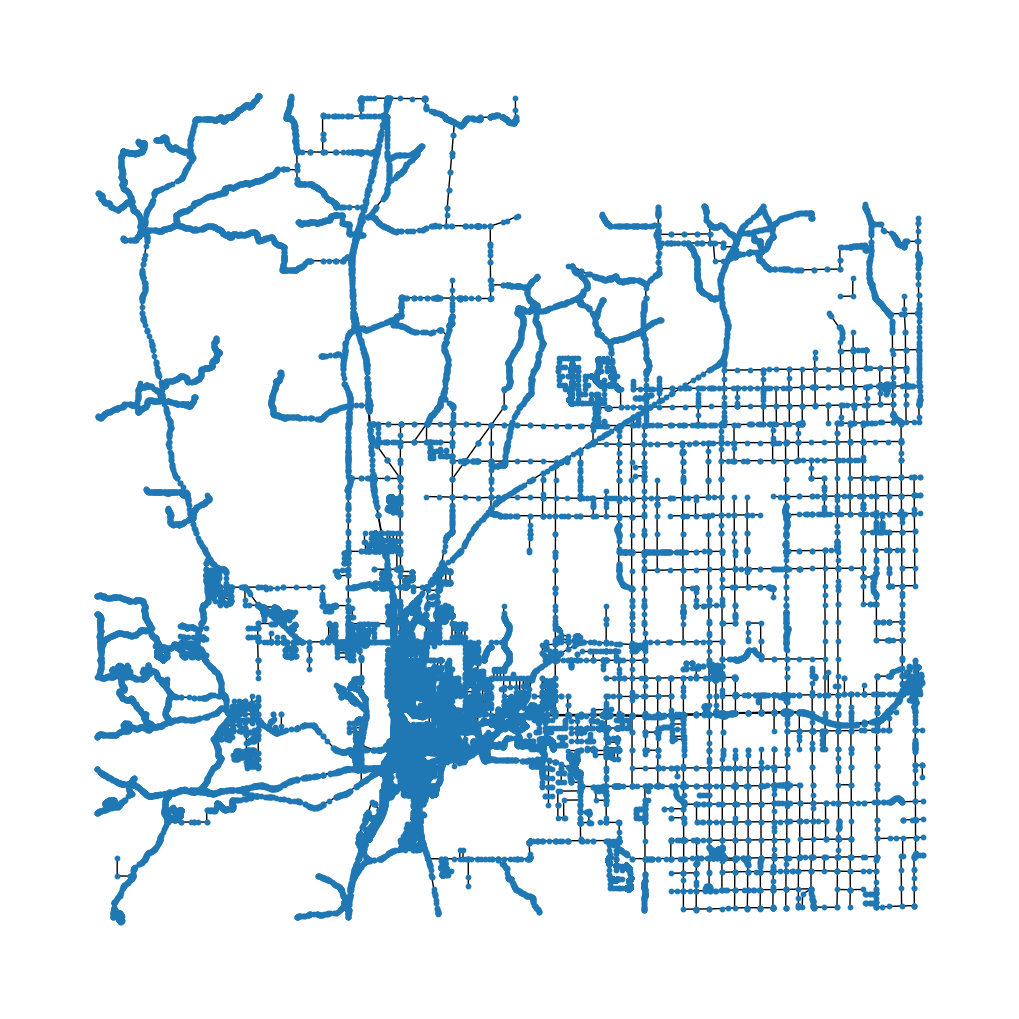

In [3]:
pos = {node: node for node in G.nodes()}  # Use node coordinates for positioning
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=10, with_labels=False)
plt.show()

In [11]:
address_shape = "address.shp"
address = gpd.read_file(os.path.join(directory, address_shape))


In [13]:
address.head()
address.columns

Index(['address', 'bldg_no', 'space', 'units', 'st_dir', 'pre_type', 'st_name',
       'st_type', 'suf_dir', 'use', 'remarks', 'zip', 'lot_no', 'blk_tr',
       'sub_name', 'sub_code', 'plat_month', 'plat_year', 'town', 'qrtr_qrtr',
       'quarter', 'section', 'township', 'range', 'co_page', 'zone_code',
       'zone_dist', 'zone_di', 'zone_chr', 'sfha', 'firm_panel', 'fire_resp',
       'vote_dist', 'vote_reps', 'senate', 'house', 'historic', 'source',
       'assigned', 'easting', 'northing', 'latitude', 'longitude',
       'legal_desc', 'owner_name', 'ownr_addr1', 'ownr_addr2', 'ownr_addr3',
       'assmt_dt', 'statepidn', 'addrid', 'join_id', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'globalid', 'geometry'],
      dtype='object')

In [23]:
# Specify the column name
column_name = 'use'  # Change this to the attribute column you're interested in

# Get unique values in the specified column
unique_values = address[column_name].unique()

# Display the unique values
print("Unique values in column '{}':".format(column_name))
for value in unique_values:
    print(value)

Unique values in column 'use':
RESIDENTIAL-SINGLE
RESIDENTIAL-MULTI
COMMERCIAL-MULTI
GOVERNMENT-CITY
COMMERCIAL-SINGLE
SCHOOL
OIL WELL
AGRICULTURAL
GOVERNMENT-STATE
RESIDENTIAL-COMMERCIAL
CHURCH
GOVERNMENT-FEDERAL
VACANT
COMMERCIAL-UTILITY
ACCESSORY
GOVERNMENT-COUNTY
SCHOOL-OTHER
CHURCH-OTHER
OTHER
OIL-OTHER
NA
None
UTILITY
RESIDENTIAL


In [25]:
# Define the output text file path
output_file_path = 'unique_address_uses.txt'

# Save unique values to the text file
with open(output_file_path, 'w') as file:
    file.write("Unique values in column '{}':\n".format(column_name))
    for value in unique_values:
        file.write(str(value) + '\n')

print("Unique values have been saved to", output_file_path)

Unique values have been saved to unique_address_uses.txt
